Task:
Rewrite existing code to represent states, variables, I, O, etc.
Using an OO approach add the elements of your experimental frame: 
class, IO, variables, connections to your IF neural network, etc.


Propose a UML diagram of your whole code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Neuron:
    def __init__(self, weights, threshold):
        self.weights = weights  #The weights of the neuron's inputs
        self.threshold = threshold  #The threshold for firing
        self.membrane_potential = 0.0  #The membrane potential of the neuron

    def integrate(self, inputs):
        total = sum(w * x for w, x in zip(self.weights, inputs))  #It calculates the weighted sum of inputs.
        self.membrane_potential += total  #We integrate the inputs into the membrane potential.

    def fire(self):
        output = int(self.membrane_potential >= self.threshold)  #It checks if the neuron fires based on the threshold.
        self.membrane_potential = 0.0  #reset the membrane potential,
        return output  #and return the firing output.

In [ ]:
class NeuralNetwork:
    def __init__(self, hidden_weights, output_weights, hidden_threshold, output_threshold):
        self.hidden_neurons = []  #List to store hidden neurons
        self.output_neurons = []  #List to store output neurons

        #We create and initialize hidden neurons with given weights and threshold.
        for w in hidden_weights:
            neuron = Neuron(w, hidden_threshold)
            self.hidden_neurons.append(neuron)

        #We create and initialize output neurons with given weights and threshold.
        for w in output_weights:
            neuron = Neuron(w, output_threshold)
            self.output_neurons.append(neuron)

    def forward(self, inputs):
        hidden_outputs = []
        for neuron in self.hidden_neurons:
            neuron.integrate(inputs)  #We integrate inputs for each hidden neuron.
            hidden_outputs.append(neuron.fire())  #We fire the hidden neuron and store its output.

        output_outputs = []
        for neuron in self.output_neurons:
            neuron.integrate(hidden_outputs)  #We integrate hidden outputs for each output neuron,
            output_outputs.append(neuron.fire())  #and fire the output neuron and store its output.

        return output_outputs  #We return the output of the neural network.

    def simulate(self, theta_values):
        activity_list = []  # List to store activity values
        duration_list = []  # List to store duration values

        for theta in theta_values:
            for neuron in self.hidden_neurons + self.output_neurons:
                neuron.threshold = neuron.threshold * theta  #We adjust the neuron thresholds.

            inputs = [1, 0]  #We define inputs/ inf/ voltage
            outputs = self.forward(inputs)  #We forward the inputs through the network.

            activity = sum(outputs)  #We calculate the total activity,
            duration = len(outputs)  #We calculate the duration of the activity.

            activity_list.append(activity)  #We add activity value to the list.
            duration_list.append(duration)  #We add duration value to the list.

        return activity_list, duration_list  #We return the activity and duration.

In [ ]:
class Experiment:
    def __init__(self, network, theta_values):
        self.network = network  #The neural network for the experiment
        self.theta_values = theta_values  #The parameter values for theta

    def run(self):
        activity_list, duration_list = self.network.simulate(self.theta_values)  #Here we simulate the network,
        self.plot_results(activity_list, duration_list)  #and plot the results.

    def plot_results(self, activity_list, duration_list):
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.theta_values, activity_list)  #here we plot activity vs theta
        plt.xlabel('Theta')
        plt.ylabel('Activity')
        plt.title('Activity vs. Theta')

        plt.subplot(1, 2, 2)
        plt.plot(self.theta_values, duration_list)  # here we plot duration vs theta
        plt.xlabel('Theta')
        plt.ylabel('Duration')
        plt.title('Duration vs. Theta')

        plt.tight_layout()
        plt.show()

In [ ]:
#We define the number of neurons per layer.
input_neurons = 2
hidden_neurons = 4
output_neurons = 2

#We define weights for the hidden layer.
hidden_weights = [
    [0.1, 0.2],  #Weights for neuron 1
    [0.1, 0.2],  #Weights for neuron 2
    [0.3, 0.2],  #Weights for neuron 3
    [0.4, 0.5]   #Weights for neuron 4
]

#We define weights for the output layer
output_weights = [
    [0.3, 0.5, 0.2, 0.5],  #Weights for neuron 1
    [0.1, 0.4, 0.6, 0.3]   #Weights for neuron 2
]

#We define thresholds for the hidden and output layers.
hidden_threshold = 0.5
output_threshold = 0.7

#The parameter values for theta
theta_values = np.linspace(0, 1, 10)  #in this case 10 values between 0 and 1

#We create the neural network with the provided parameters.
network = NeuralNetwork(hidden_weights, output_weights, hidden_threshold, output_threshold)

#Finally, create the experiment and run it.
experiment = Experiment(network, theta_values)
experiment.run()


UML Diagram
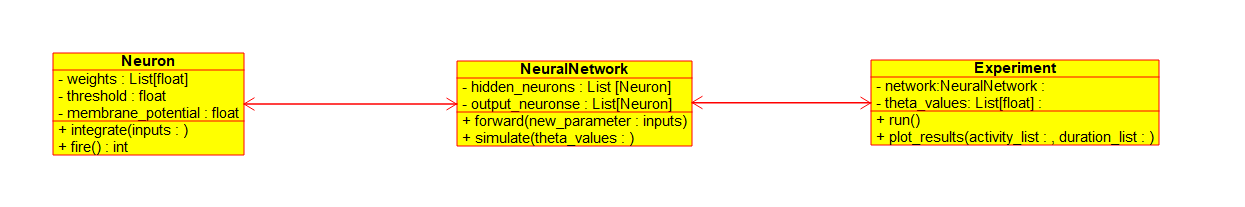

The class Neuron represents an individual neuron in the network, with attributes for weights, threshold, and membrane potential.
Relationship of Neuron class: composition with Neural Network 
The diagram shows the relationships between the classes, with the Experiment class having a composition relationship with the NeuralNetwork class, and the NeuralNetwork class having composition relationships with the Neuron class.


The class Experiment represents an experiment that runs the neural network simulation with different theta values and plots the results.
Relationship of Experiment class: composition with Neural Network 

NeuralNetwork represents a neural network composed of hidden and output layers, each containing multiple neurons.
Relationship of Neural Netwok: composition with Neuron and Experiment

'+' functions:


- Forward funtion in the NeuralNetwork class performs the forward path through the network
- Integrate function in the Neuron class calculates the weighted sum of inputs and the fire method checks if the threshold is exceeded.